In this homework, you need to implement a neural network class in Python without using
any framework library (i.e., tensorflow, keras, pytorch etc.). You can use numpy, pandas,
math or any helper libraries.

Your neural network class should have following properties:
- Parametric input size
- Parametric output size
- Just implement fully connected layers; any number of such layers can be added
(Let’s keep it simple, no convolution, recurrent or other types of layers are needed!)
- At least 2 activation function alternatives for each layer (i.e., tanh, sigmoid)
- At least 2 loss function alternatives for output layer (i.e., mse, rmse)
- It should print training errors during training.


Your neural network should have any necessary methods/functions of your choice. But do
not forget to include the following method/function names:

- fit/train: trains the neural network
- predict: makes prediction for the input data


Using your neural network class, train a neural network and make predictions on
data to show the working and performance of your implementation. You should
submit the data you used with a file name: nn_data.csv
Optionally, you can implement a softmax function for the output layer that identifies
which prediction class is the output. By using the softmax function, it will be easy to
understand the output of the predictions.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
data

array([[7, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [3]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train

array([5, 4, 4, ..., 0, 6, 8], dtype=int64)

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 1 6 ... 4 7 1] [5 4 4 ... 0 6 8]
0.10378048780487804
Iteration:  10
[2 4 6 ... 0 3 9] [5 4 4 ... 0 6 8]
0.2339268292682927
Iteration:  20
[2 4 9 ... 0 9 4] [5 4 4 ... 0 6 8]
0.3171707317073171
Iteration:  30
[2 4 9 ... 0 6 9] [5 4 4 ... 0 6 8]
0.3758292682926829
Iteration:  40
[2 4 9 ... 0 6 9] [5 4 4 ... 0 6 8]
0.4136341463414634
Iteration:  50
[5 4 9 ... 0 6 9] [5 4 4 ... 0 6 8]
0.4482926829268293
Iteration:  60
[5 4 9 ... 0 6 9] [5 4 4 ... 0 6 8]
0.4795121951219512
Iteration:  70
[5 4 9 ... 2 6 9] [5 4 4 ... 0 6 8]
0.5063170731707317
Iteration:  80
[5 4 9 ... 2 6 9] [5 4 4 ... 0 6 8]
0.5341951219512195
Iteration:  90
[5 4 9 ... 2 6 9] [5 4 4 ... 0 6 8]
0.5582682926829269
Iteration:  100
[5 4 9 ... 2 6 9] [5 4 4 ... 0 6 8]
0.5796829268292683
Iteration:  110
[5 4 9 ... 6 6 9] [5 4 4 ... 0 6 8]
0.5988292682926829
Iteration:  120
[5 4 9 ... 6 6 9] [5 4 4 ... 0 6 8]
0.6174634146341463
Iteration:  130
[5 4 9 ... 6 6 7] [5 4 4 ... 0 6 8]
0.6375853658536585
Iteration:  140


# ~85% accuracy on training set.

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


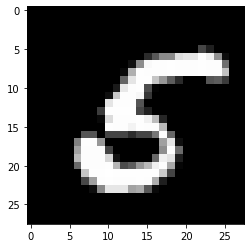

Prediction:  [4]
Label:  4


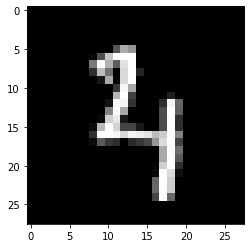

Prediction:  [4]
Label:  4


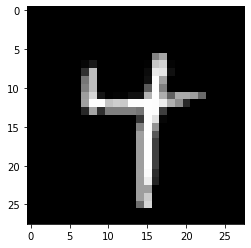

Prediction:  [8]
Label:  5


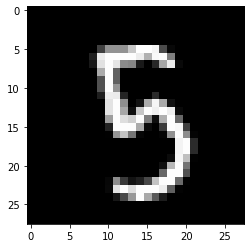

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

# Finally, let's find the accuracy on the dev set:

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 5 1 7 9 6 1 9 7 8 7 6 8 4 2 4 4 8 5 5 6 9 4 6 9 2 0 9 2 2 1 8 4 5 8 0 1
 8 3 8 5 2 7 0 3 4 2 4 3 5 2 4 6 4 8 0 2 4 7 9 0 4 9 1 9 7 6 3 2 7 9 8 6 5
 2 2 7 0 8 6 5 1 7 9 1 7 3 3 6 9 4 8 1 9 2 0 2 9 3 1 4 1 5 1 6 7 1 5 0 4 6
 1 1 4 9 8 5 8 0 2 2 4 7 9 8 1 8 8 1 0 1 0 2 4 1 8 1 9 4 7 5 9 4 3 3 1 1 7
 4 9 1 0 4 6 4 5 0 6 1 9 2 3 1 1 2 1 3 8 2 9 6 8 1 2 1 2 4 2 9 0 5 2 7 9 2
 5 9 2 4 5 4 0 7 3 5 9 6 9 6 4 4 7 7 0 9 6 3 4 3 1 2 1 0 0 9 5 9 8 4 4 3 7
 4 6 9 3 8 2 0 5 1 5 9 9 6 0 3 1 4 2 3 2 8 8 7 7 4 1 3 5 0 8 1 8 6 7 8 1 3
 9 1 0 1 0 6 3 3 1 8 1 9 6 4 1 3 0 2 0 0 0 4 0 7 1 1 3 4 2 6 7 6 3 5 6 0 1
 6 2 2 6 6 6 8 7 0 4 7 8 2 8 1 6 3 7 1 7 6 3 5 7 8 9 3 3 4 4 0 2 8 4 7 6 1
 8 8 2 0 5 9 7 6 9 4 6 4 2 9 4 8 4 9 0 1 3 0 1 9 8 0 3 3 0 3 6 7 8 2 4 9 0
 8 0 6 3 3 9 5 2 6 7 4 0 7 3 2 2 9 4 1 8 7 1 9 1 3 8 1 7 2 4 6 4 8 5 9 6 8
 7 2 5 0 3 5 5 7 0 2 3 4 8 3 6 2 3 3 0 2 0 9 6 3 5 9 1 1 1 9 2 2 0 0 5 6 3
 6 3 9 7 9 3 2 3 3 3 4 3 3 3 2 9 3 3 2 3 3 2 2 1 9 1 7 8 0 5 5 7 6 1 7 3 3
 8 7 7 1 6 9 8 7 2 1 1 7 

0.853

# Still 84% accuracy, so our model generalized from the training data pretty well.